# Gamer study : Asynchrony task analysis

`
Created on Mon Jan 20 2020
Author: Francois R. Foerster
`

In [98]:
# Use MNE
%matplotlib qt
import numpy as np
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import mne
from mne.event import define_target_events
from mne.baseline import rescale


# Groups of subjects:
# NVGP: sub 1-2-4-5
# VGP: sub 3

# Load a set of epochs for each participant

In [181]:
# For one participant
nameFile = input("Please enter a name: ")

# Epochs of Asynchronies
myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/' + nameFile + '_Async-epo.fif'
epochs = mne.read_epochs(myPath, preload=True)
epochs_Alpha = epochs.copy().filter(l_freq = 8, h_freq = 12)

Please enter a name: sub2
Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub2_Async-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...     398.00 ms
        0 CTF compensation matrices available
407 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 sec)



<ipython-input-181-e5747417eebf>:7: RuntimeWarning: filter_length (825) is longer than the signal (750), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_Alpha = epochs.copy().filter(l_freq = 8, h_freq = 12)


In [188]:
# ?hilbert
# hilb_evoked_phase.plot()
# epochs.ch_names(['Oz'])
epochs.pick_channels(['Oz'])

<EpochsFIF  |   407 events (all good), -1.1 - 0.398 sec, baseline [-1, 0], ~2.4 MB, data loaded,
 'D0/Async': 43
 'D0/Sync': 85
 'D11/Async/LL': 9
 'D11/Async/LR': 9
 'D11/Async/RL': 10
 'D11/Async/RR': 12
 'D11/Sync/LL': 11
 'D11/Sync/LR': 17
 'D11/Sync/RL': 9
 'D11/Sync/RR': 15
 'D33/Async/LL': 17
 'D33/Async/LR': 25
 'D33/Async/RL': 25
 'D33/Async/RR': 14
 'D33/Sync/LL': 4
 'D33/Sync/LR': 3
 'D33/Sync/RL': 5
 'D33/Sync/RR': 4
 'D66/Async/LL': 22
 'D66/Async/LR': 21
 'D66/Async/RL': 22
 'D66/Async/RR': 23
 'D66/Sync/LL': 1
 'D66/Sync/LR': 0
 'D66/Sync/RL': 1
 'D66/Sync/RR': 0>

In [200]:
plt.close('all')

# Take a single trial and filter with a pass-band
epoch_Alpha = epochs[5].pick_channels(['Oz']).copy().filter(8, 12, l_trans_bandwidth=2., h_trans_bandwidth=2.,fir_design='firwin')
# Extract the envelope from it
hilb_evoked_env = epoch_Alpha.copy().apply_hilbert(envelope = True).average()
# Extract the phase from it
hilb_evoked_phase = epoch_Alpha.copy().apply_hilbert(envelope = False).average()


epoch_Alpha = epoch_Alpha.average()

evoked_dict = [epoch_Alpha, hilb_evoked_env, hilb_evoked_phase]
mne.viz.plot_compare_evokeds(evoked_dict)


epoch_Alpha, hilb_evoked_env, hilb_evoked_phase

#hilb_evoked_phase.info

hilb_evoked_phase.apply_function(np.angle)





#mne.viz.plot_epochs([epoch_Alpha,hilb_evoked], picks = ["Oz"])


#hilb_alpha
#raw_amp.apply_function(np.abs, hilb_picks)

# raw_band = raw.copy()

# # Take the amplitude and phase
# raw_amp = raw_hilb.copy()
# raw_amp.apply_function(np.abs, hilb_picks)
# raw_phase = raw_hilb.copy()
# raw_phase.apply_function(np.angle, hilb_picks)

# _, (a1, a2) = plt.subplots(2, 1, figsize=(15, 10))
# a1.plot(raw_band[hilb_picks[0]][0][0].real)
# a1.plot(raw_amp[hilb_picks[0]][0][0].real)
# a2.plot(raw_phase[hilb_picks[0]][0][0].real)
# a1.set_title('Amplitude of frequency band')
# a2.set_title('Phase of frequency band')

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 13.00 Hz)
- Filter length: 825 samples (1.650 sec)



<ipython-input-200-cbe42f3ec14b>:4: RuntimeWarning: filter_length (825) is longer than the signal (750), distortion is likely. Reduce filter length or filter a longer signal.
  epoch_Alpha = epochs[5].pick_channels(['Oz']).copy().filter(8, 12, l_trans_bandwidth=2., h_trans_bandwidth=2.,fir_design='firwin')


AttributeError: 'EvokedArray' object has no attribute 'apply_function'

## Build the evoked objects for a single participant

In [157]:
baseline = (-2., -1.)
method='median'

epochs_D0 = epochs['D0']
epochs_D11 = epochs['D11']
epochs_D33 = epochs['D33']
epochs_D66 = epochs['D66']

epochs_D0_Alpha = epochs_Alpha['D0']
epochs_D11_Alpha = epochs_Alpha['D11']
epochs_D33_Alpha = epochs_Alpha['D33']
epochs_D66_Alpha = epochs_Alpha['D66']

evoked_0_ERP = epochs_D0.copy().apply_baseline(baseline=baseline).average(method=method)
evoked_11_ERP = epochs_D11.copy().apply_baseline(baseline=baseline).average(method=method)
evoked_33_ERP = epochs_D33.copy().apply_baseline(baseline=baseline).average(method=method)
evoked_66_ERP = epochs_D66.copy().apply_baseline(baseline=baseline).average(method=method)

evoked_11_ERP_Async = epochs_D11['Async'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_11_ERP_Sync = epochs_D11['Sync'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_33_ERP_Async = epochs_D33['Async'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_33_ERP_Sync = epochs_D33['Sync'].copy().apply_baseline(baseline=baseline).average(method=method)

evoked_11_Alpha_Async = epochs_D11_Alpha['Async'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_11_Alpha_Sync = epochs_D11_Alpha['Sync'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_33_Alpha_Async = epochs_D33_Alpha['Async'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_33_Alpha_Sync = epochs_D33_Alpha['Sync'].copy().apply_baseline(baseline=baseline).average(method=method)

# 1st letter == trial t-1 / 2nd letter == trial t
evoked_LL_Alpha = epochs_Alpha['LL'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_RR_Alpha = epochs_Alpha['RR'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_LR_Alpha = epochs_Alpha['RL'].copy().apply_baseline(baseline=baseline).average(method=method)
evoked_RL_Alpha = epochs_Alpha['LR'].copy().apply_baseline(baseline=baseline).average(method=method)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


In [103]:
vmin, vmax = -15, 15
epochsA = epochs_D0.copy().apply_baseline(baseline=baseline).crop(-.4, 0.4)
mne.viz.plot_epochs_image(epochsA, ["C3"],
                          vmin=vmin, vmax=vmax)
mne.viz.plot_epochs_image(epochsA, ["Oz"],
                          vmin=vmin, vmax=vmax)


epochsB = epochs_D0_Alpha.copy().apply_baseline(baseline=baseline).crop(-.4, 1)
mne.viz.plot_epochs_image(epochsB, ["C3"],
                          vmin=vmin, vmax=vmax)
mne.viz.plot_epochs_image(epochsB, ["Oz"],
                          vmin=vmin, vmax=vmax)

Applying baseline correction (mode: mean)
113 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-103-eab1a1ede2c7>:2: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochsA = epochs_D0.copy().apply_baseline(baseline=baseline).crop(-.4, 0.4)


113 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Applying baseline correction (mode: mean)
113 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-103-eab1a1ede2c7>:9: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochsB = epochs_D0_Alpha.copy().apply_baseline(baseline=baseline).crop(-.4, 1)


113 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


[<Figure size 1280x960 with 4 Axes>]

In [111]:
vmin, vmax, size = (-20, 20, 0.5)

plt.close('all')

mne.viz.plot_epochs_image(epochs_D33_Alpha['Async'].copy().crop(-.2, 0.4),
                          ["Oz"], sigma=0, vmin=vmin, vmax=vmax, show = False)
mne.viz.plot_epochs_image(epochs_D33_Alpha['Sync'].copy().crop(-.2, 0.4),
                          ["Oz"], sigma=0, vmin=vmin, vmax=vmax, show = False)

plt.show()


63 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-111-e1bbc1cb4482>:5: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  mne.viz.plot_epochs_image(epochs_Alpha['LL'].copy().crop(-.2, 0.4),


65 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-111-e1bbc1cb4482>:8: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  mne.viz.plot_epochs_image(epochs_D33_Alpha['Async'].copy().crop(-.2, 0.4),


15 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-111-e1bbc1cb4482>:10: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  mne.viz.plot_epochs_image(epochs_D33_Alpha['Sync'].copy().crop(-.2, 0.4),


In [133]:
plt.close('all')
p1 = mne.viz.plot_epochs_image(epochs_D11_Alpha['Async'].copy().crop(-.2, 0.4), ["Oz"],
                          vmin=vmin, vmax=vmax, show = True)
p2 = mne.viz.plot_epochs_image(epochs_D11_Alpha['Sync'].copy().crop(-.2, 0.4), ["Oz"],
                          vmin=vmin, vmax=vmax, show = True)

plt.show()

29 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-133-bd09a5bce9ba>:2: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  p1 = mne.viz.plot_epochs_image(epochs_D11_Alpha['Async'].copy().crop(-.2, 0.4), ["Oz"],


60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-133-bd09a5bce9ba>:4: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  p2 = mne.viz.plot_epochs_image(epochs_D11_Alpha['Sync'].copy().crop(-.2, 0.4), ["Oz"],


In [7]:
(1000/8, 1000/12)

(125.0, 83.33333333333333)

In [127]:
# Plot ERPs 
vmin, vmax, size = (-20, 20, 0.5)

plt.close('all')

fig, axes = plt.subplots(1, 4, figsize=(14, 14))

mne.viz.plot_epochs_image(epochs_D11_Alpha['Async'].copy().crop(-.2, 0.4), ["Oz"],
                          vmin=vmin, vmax=vmax, show = False, axes = axes[0])
mne.viz.plot_epochs_image(epochs_D11_Alpha['Sync'].copy().crop(-.2, 0.4), ["Oz"],
                          vmin=vmin, vmax=vmax, show = False, axes = axes[1])
mne.viz.plot_epochs_image(epochs_D33_Alpha['Async'].copy().crop(-.2, 0.4), ["Oz"],
                          vmin=vmin, vmax=vmax, show = False, axes = axes[2])
mne.viz.plot_epochs_image(epochs_D33_Alpha['Sync'].copy().crop(-.2, 0.4), ["Oz"],
                          vmin=vmin, vmax=vmax, show = False, axes = axes[3])

#evoked_diff = mne.combine_evoked([mne.grand_average(evoked_Tlong), -mne.grand_average(evoked_Nlong)], weights='equal')


plt.show()



<ipython-input-127-772e502d1751>:8: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  mne.viz.plot_epochs_image(epochs_D11_Alpha['Async'].copy().crop(-.2, 0.4), ["Oz"],


ValueError: Since evoked=True and colorbar=True, "axes" must be length 3, got 1.

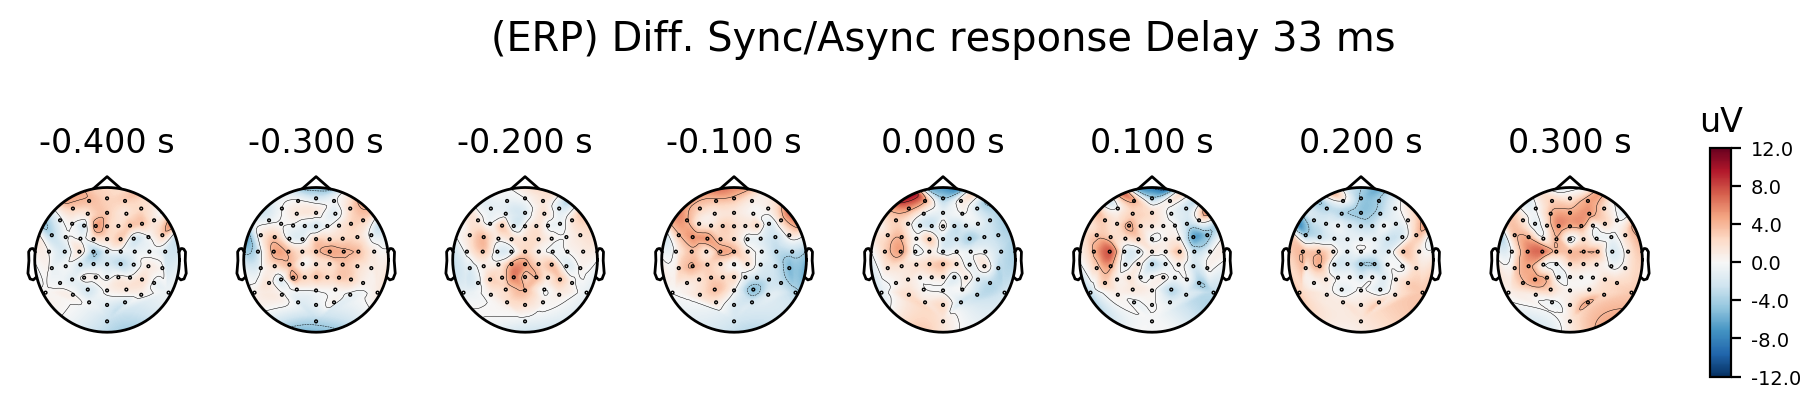

In [163]:
plt.close('all')
# mne.viz.plot_epochs_image(epochs_D33_Alpha['Async'].copy(), ["Oz"], sigma=0,
#                           vmin=vmin, vmax=vmax, show = False)
# mne.viz.plot_epochs_image(epochs_D33_Alpha['Sync'].copy(), ["Oz"], sigma=0,
#                           vmin=vmin, vmax=vmax, show = False)

evoked_diffERP11 = mne.combine_evoked([evoked_11_ERP_Sync, -evoked_11_ERP_Async], weights='equal')
evoked_diffERP33 = mne.combine_evoked([evoked_33_ERP_Sync, -evoked_33_ERP_Async], weights='equal')
evoked_diffAlpha11 = mne.combine_evoked([evoked_11_Alpha_Sync, -evoked_11_Alpha_Async], weights='equal')
evoked_diffAlpha33 = mne.combine_evoked([evoked_33_Alpha_Sync, -evoked_33_Alpha_Async], weights='equal')


times = [-0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3]
kwargs = dict(vmin = -5, vmax = 5, size = 0.7, times = times)
mne.viz.topomap.plot_evoked_topomap(evoked_diffAlpha11, **kwargs, title = "(Alpha) Diff. Sync/Async response Delay 11 ms")
mne.viz.topomap.plot_evoked_topomap(evoked_diffAlpha33, **kwargs, title = "(Alpha) Diff. Sync/Async response Delay 33 ms")

kwargs = dict(vmin = -12, vmax = 12, size = 0.7, times = times)
mne.viz.topomap.plot_evoked_topomap(evoked_diffERP11, **kwargs, title = "(ERP) Diff. Sync/Async response Delay 11 ms")
mne.viz.topomap.plot_evoked_topomap(evoked_diffERP33, **kwargs, title = "(ERP) Diff. Sync/Async response Delay 33 ms")





In [165]:
# define frequencies of interest (log-spaced)
freqs = np.logspace(*np.log10([8, 12]), num=64)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = mne.time_frequency.tfr_morlet(epochs_D0, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
# ITC gives us an idea of the evoked response

power.crop(-0.8, 0.3)  # crop to remove edge artifacts
itc.crop(-0.8, 0.3)   # crop to remove edge artifacts

print('freqs: ', freqs)
print('n_cycles: ', n_cycles)


freqs:  [ 8.          8.05165367  8.10364086  8.15596372  8.2086244   8.26162511
  8.31496802  8.36865535  8.42268932  8.47707218  8.53180617  8.58689357
  8.64233664  8.6981377   8.75429904  8.81082301  8.86771193  8.92496817
  8.9825941   9.0405921   9.09896457  9.15771394  9.21684264  9.27635311
  9.33624783  9.39652927  9.45719992  9.51826232  9.57971897  9.64157243
  9.70382526  9.76648004  9.82953936  9.89300584  9.95688211 10.0211708
 10.08587459 10.15099615 10.21653818 10.2825034  10.34889453 10.41571434
 10.48296558 10.55065104 10.61877353 10.68733586 10.75634088 10.82579145
 10.89569044 10.96604074 11.03684528 11.10810698 11.1798288  11.25201371
 11.32466469 11.39778476 11.47137694 11.54544429 11.61998987 11.69501676
 11.77052809 11.84652697 11.92301655 12.        ]
n_cycles:  [4.         4.02582684 4.05182043 4.07798186 4.1043122  4.13081255
 4.15748401 4.18432767 4.21134466 4.23853609 4.26590309 4.29344678
 4.32116832 4.34906885 4.37714952 4.4054115  4.43385597 4.46248409
 

In [20]:
# Inspect power and ITC

baseline_mode = 'logratio'
baseline = (None, 0)

power.plot_topo(baseline=baseline, mode=baseline_mode, title='Average power');
#itc.plot(['Oz'], baseline=baseline, mode=baseline_mode, title=power.ch_names['Oz']); # Pick a channel
itc.plot_topo(title='Inter-Trial coherence', vmin=0., vmax=1., cmap='Reds');


Applying baseline correction (mode: logratio)
No baseline correction applied


/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:216: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
/Users/francoisfoerster/opt/an

# Load epochs from all participant

In [18]:
myPath = '/Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/'

evokeds_D0 = list()
evokeds_D0_Async = list()
evokeds_D0_Sync = list()
evokeds_D11 = list()
evokeds_D11_Async = list()
evokeds_D11_Sync = list()
evokeds_D33 = list()
evokeds_D33_Async = list()
evokeds_D33_Sync = list()
evokeds_D66 = list()
evokeds_D66_Async = list()
evokeds_D66_Sync = list()

# 1st letter == trial t-1 / 2nd letter == trial t
evokeds_LL = list()
evokeds_RR = list()
evokeds_LR = list()
evokeds_RL = list()


evokeds_D0_Alpha = list()
evokeds_D0_Async_Alpha = list()
evokeds_D0_Sync_Alpha = list()
evokeds_D11_Alpha = list()
evokeds_D11_Async_Alpha = list()
evokeds_D11_Sync_Alpha = list()
evokeds_D33_Alpha = list()
evokeds_D33_Async_Alpha = list()
evokeds_D33_Sync_Alpha = list()
evokeds_D66_Alpha = list()
evokeds_D66_Async_Alpha = list()
evokeds_D66_Sync_Alpha = list()

evokeds_LL_Alpha = list()
evokeds_RR_Alpha = list()
evokeds_LR_Alpha = list()
evokeds_RL_Alpha = list()

baseline = (-2., -1.)
method='median'

from scipy.signal import hilbert
import os

for file in os.listdir(myPath):
    if file.endswith("_Async-epo.fif"):
        fname = os.path.join(file)
        epochs = mne.read_epochs(myPath+fname, preload=True)
        epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12)

        evokeds_D0.append(epochs['D0'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D0_Async.append(epochs['D0/Async'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D0_Sync.append(epochs['D0/Sync'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D11.append(epochs['D11'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D11_Async.append(epochs['D11/Async'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D11_Sync.append(epochs['D11/Sync'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D33.append(epochs['D33'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D33_Async.append(epochs['D33/Async'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D33_Sync.append(epochs['D33/Sync'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D66.append(epochs['D66'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D66_Async.append(epochs['D66/Async'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D66_Sync.append(epochs['D66/Sync'].apply_baseline(baseline=baseline).average(method=method))
        
        evokeds_LL.append(epochs['LL'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_RR.append(epochs['RR'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_RL.append(epochs['LR'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_LR.append(epochs['RL'].apply_baseline(baseline=baseline).average(method=method))

        evokeds_D0_Alpha.append(epochs_alpha['D0'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D0_Async_Alpha.append(epochs_alpha['D0/Async'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D0_Sync_Alpha.append(epochs_alpha['D0/Sync'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D11_Alpha.append(epochs_alpha['D11'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D11_Async_Alpha.append(epochs_alpha['D11/Async'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D11_Sync_Alpha.append(epochs_alpha['D11/Sync'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D33_Alpha.append(epochs_alpha['D33'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D33_Async_Alpha.append(epochs_alpha['D33/Async'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D33_Sync_Alpha.append(epochs_alpha['D33/Sync'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D66_Alpha.append(epochs_alpha['D66'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D66_Async_Alpha.append(epochs_alpha['D66/Async'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_D66_Sync_Alpha.append(epochs_alpha['D66/Sync'].apply_baseline(baseline=baseline).average(method=method))
        
        evokeds_LL_Alpha.append(epochs_alpha['LL'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_RR_Alpha.append(epochs_alpha['RR'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_RL_Alpha.append(epochs_alpha['LR'].apply_baseline(baseline=baseline).average(method=method))
        evokeds_LR_Alpha.append(epochs_alpha['RL'].apply_baseline(baseline=baseline).average(method=method))        
        
        


Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub1_Async-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...     398.00 ms
        0 CTF compensation matrices available
398 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 sec)



<ipython-input-18-17279b1da924>:51: RuntimeWarning: filter_length (825) is longer than the signal (750), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode

<ipython-input-18-17279b1da924>:51: RuntimeWarning: filter_length (825) is longer than the signal (750), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/francoisfoerster/opt/anaconda3/envs/mne/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
<ipython-input-18-17279b1da924>:64: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evokeds_D66_Sync.append(epochs['D66/Sync'].apply_baseline(baseline=baseline).average(method=method))


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


<ipython-input-18-17279b1da924>:82: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evokeds_D66_Sync_Alpha.append(epochs_alpha['D66/Sync'].apply_baseline(baseline=baseline).average(method=method))


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /Users/francoisfoerster/Documents/GamerLocalAnalysis/Epochs/sub2_Async-epo.fif ...
    Found the data of interest:
        t =   -1100.00 ...     398.00 ms
        0 CTF compensation matrices available
407 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 sec)



<ipython-input-18-17279b1da924>:51: RuntimeWarning: filter_length (825) is longer than the signal (750), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode

<ipython-input-18-17279b1da924>:51: RuntimeWarning: filter_length (825) is longer than the signal (750), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode

<ipython-input-18-17279b1da924>:51: RuntimeWarning: filter_length (825) is longer than the signal (750), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_alpha = epochs.copy().filter(l_freq = 8, h_freq = 12)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode

In [19]:
mne.grand_average(evokeds_D11)

Identifying common channels ...
all channels are corresponding, nothing to do.


<Evoked  |  'Grand average (n = 5)' (average, N=5), [-1.1, 0.398] sec, 64 ch, ~545 kB>

### ERPs

In [15]:
# Per type of Asynchronies

plt.close("all")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,8))


conditions = ["0 ms", "11 ms", "33 ms", "66 ms"]
c1, c2 = -0.5, None

kwargs = dict(ylim=dict(eeg=[0, 7]), title = "ERPs of Asynchronies", show = False,
              styles={"1": {"linewidth": 1}})

avD0 = mne.grand_average(evokeds_D0).crop(c1, c2).copy()
avD11 = mne.grand_average(evokeds_D11).crop(c1, c2).copy()
avD33 = mne.grand_average(evokeds_D33).crop(c1, c2).copy()
avD66 = mne.grand_average(evokeds_D66).crop(c1, c2).copy()

evoked_dict = [avD0, avD11, avD33, avD66]

mne.viz.plot_compare_evokeds(evoked_dict, **kwargs, axes=axes[0])


kwargs = dict(ylim=dict(eeg=[-10, 5]), title = "ERPs of Asynchronies", picks = "Oz", show = False,)

avD0 = mne.grand_average(evokeds_D0).crop(c1, c2).copy()
avD11 = mne.grand_average(evokeds_D11).crop(c1, c2).copy()
avD33 = mne.grand_average(evokeds_D33).crop(c1, c2).copy()
avD66 = mne.grand_average(evokeds_D66).crop(c1, c2).copy()

evoked_dict = [avD0, avD11, avD33, avD66]


mne.viz.plot_compare_evokeds(evoked_dict, **kwargs, axes=axes[1])

# evoked_dict = dict()
# for condition in conditions:
#     evoked_dict[condition.replace(" ", "/")] = mne.read_evokeds(
#         fname, baseline=(None, 0), proj=True, condition=condition)
# print(evoked_dict)

# colors = dict(Left="Crimson", Right="CornFlowerBlue")
# linestyles = dict(Auditory='-', visual='--')
# pick = evoked_dict["Left/Auditory"].ch_names.index('MEG 1811')

# mne.viz.plot_compare_evokeds(evoked_dict, picks=pick, colors=colors,
#                              linestyles=linestyles, split_legend=True)


#evoked_l_aud.plot_topomap(axes=ax[0], colorbar=True, **kwargs)

# evoked_diff = mne.combine_evoked([mne.grand_average(epochs_D11_Alpha['Async']), -mne.grand_average(epochs_D11_Alpha['Sync'])], weights='equal')


# evoked_diff = mne.combine_evoked([mne.grand_average(epochs_D11_Alpha['Async']), -mne.grand_average(epochs_D11_Alpha['Sync'])], weights='equal')
# mne.viz.topomap.plot_evoked_topomap(evoked_diff.crop(-.6,0.4), vmin=vmin, vmax=vmax)


plt.show()

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


In [25]:
# Per type of Response

evoked_diff = mne.combine_evoked([mne.grand_average(epochs_D11_Alpha['Async']), -mne.grand_average(epochs_D11_Alpha['Sync'])], weights='equal')
mne.viz.topomap.plot_evoked_topomap(evoked_diff.crop(-.6,0.4), vmin=vmin, vmax=vmax)



TypeError: All elements must be an instance of Evoked or AverageTFR, got <class 'mne.epochs.EpochsFIF'> instead

In [16]:
times = numpy.arange(-0.3, 0.3, 0.1)
kwargs = dict(times=times, show=False, vmin=-4, vmax=4, time_unit='ms')

fig, ax = plt.subplots(1, 7, figsize=(8, 8))

mne.grand_average(evokeds_LL_Alpha).plot_topomap(axes=ax[0,], colorbar=True, **kwargs)
#mne.grand_average(evokeds_LR_Alpha).plot_topomap(axes=ax[1], colorbar=False, **kwargs)
#mne.grand_average(evokeds_RR_Alpha).plot_topomap(axes=ax[2], colorbar=False, **kwargs)
#mne.grand_average(evokeds_RL_Alpha).plot_topomap(axes=ax[3], colorbar=False, **kwargs)

for ax, title in zip(ax[:4], ['LL', 'LR', 'RR', 'RL']):
    ax.set_title(title)
plt.show()

Identifying common channels ...
all channels are corresponding, nothing to do.


RuntimeError: Axes and times must be equal in sizes.

### Adaptation effect: laterality facilitation state in pre-stimuli period

#### ERPs

In [ ]:
plt.close('all')

evoked_diffL = mne.combine_evoked([mne.grand_average(evokeds_LL), -mne.grand_average(evokeds_LR)], weights='equal')
evoked_diffR = mne.combine_evoked([mne.grand_average(evokeds_RR), -mne.grand_average(evokeds_RL)], weights='equal')

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,12))

kwargs = dict(ylim=dict(eeg=[-5, 5]))
kwargsDiff = dict(ylim=dict(eeg=[-2, 2]))


####### LL-LR
### GFP (all electrodes)
mne.viz.plot_compare_evokeds(dict(LL=mne.grand_average(evokeds_LL), LR=mne.grand_average(evokeds_LR)),
                            styles={"LL": {"linewidth": 1}, "LR": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[0,0], ylim=dict(eeg=[0, 4]))

mne.viz.plot_compare_evokeds(dict(Difference = evoked_diffL),
                            styles={"Difference": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[1,0], ylim=dict(eeg=[0, 3]))
     
### GFP (lateralized electrodes electrodes)
# Left
mne.viz.plot_compare_evokeds(dict(LL=evokeds_LL, LR=evokeds_LR), picks = ['O1','PO3','PO7'],
                            styles={"LL": {"linewidth": 1}, "LR": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[0,1], ylim=dict(eeg=[0, 10])) 

mne.viz.plot_compare_evokeds(dict(Difference = evoked_diffL), picks = ['O1','PO3','PO7'],
                            styles={"Difference": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[1,1], ylim=dict(eeg=[0, 5])) 

# Right
mne.viz.plot_compare_evokeds(dict(LL=evokeds_LL, LR=evokeds_LR), picks = ['O2','PO4','PO8'],
                            styles={"LL": {"linewidth": 1}, "LR": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[0,2], ylim=dict(eeg=[0, 10])) 

mne.viz.plot_compare_evokeds(dict(Difference = evoked_diffL), picks = ['O2','PO4','PO8'],
                            styles={"Difference": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[1,2], ylim=dict(eeg=[0, 5])) 


####### RR-RL
evoked_diffL = mne.combine_evoked([mne.grand_average(evokeds_LL), -mne.grand_average(evokeds_LR)], weights='equal')
evoked_diffR = mne.combine_evoked([mne.grand_average(evokeds_RR), -mne.grand_average(evokeds_RL)], weights='equal')


### GFP (all electrodes)
mne.viz.plot_compare_evokeds(dict(RR=mne.grand_average(evokeds_RR), RL=mne.grand_average(evokeds_RL)),
                            styles={"RR": {"linewidth": 1}, "RL": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[2,0], ylim=dict(eeg=[0, 4]))

mne.viz.plot_compare_evokeds(dict(Difference = evoked_diffR),
                            styles={"Difference": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[3,0], ylim=dict(eeg=[0, 3]))
     
### GFP (lateralized electrodes electrodes)
# Left
mne.viz.plot_compare_evokeds(dict(RR=evokeds_RR, RL=evokeds_RL), picks = ['O1','PO3','PO7'],
                            styles={"RR": {"linewidth": 1}, "RL": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[2,1], ylim=dict(eeg=[0, 10])) 

mne.viz.plot_compare_evokeds(dict(Difference = evoked_diffR), picks = ['O1','PO3','PO7'],
                            styles={"Difference": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[3,1], ylim=dict(eeg=[0, 5])) 

# Right
mne.viz.plot_compare_evokeds(dict(RR=evokeds_RR, RL=evokeds_RL), picks = ['O2','PO4','PO8'],
                            styles={"RR": {"linewidth": 1}, "RL": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[2,2], ylim=dict(eeg=[0, 10])) 

mne.viz.plot_compare_evokeds(dict(Difference = evoked_diffL), picks = ['O2','PO4','PO8'],
                            styles={"Difference": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[3,2], ylim=dict(eeg=[0, 5])) 




### Plot the differences of GFPs per laterality and sides of asynhronies
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,6))

evokedsL_left = evoked_diffL.copy().pick(['O1','PO3','PO7'])
evokedsL_right = evoked_diffL.copy().pick(['O2','PO4','PO8'])
evokedsR_left = evoked_diffL.copy().pick(['O1','PO3','PO7'])
evokedsR_right = evoked_diffL.copy().pick(['O2','PO4','PO8'])
 
evoked_diffL_lat = mne.combine_evoked([evokedsL_left,
                                  -evokedsL_right], weights='equal')
evoked_diffR_lat = mne.combine_evoked([evokedsR_left,
                                  -evokedsR_right], weights='equal')

# Compare left minus right electrodes subsets with current stimulus on the Left first

mne.viz.plot_compare_evokeds(dict(LeftElectrodes = evokedsL_left),
                            styles={"LeftElectrodes": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[0,0], ylim=dict(eeg=[0, 5])) 

mne.viz.plot_compare_evokeds(dict(Difference = evokedsL_right),
                            styles={"RightElectrodes": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[0,1], ylim=dict(eeg=[0, 5])) 

mne.viz.plot_compare_evokeds(dict(Difference = evoked_diffL_lat),
                            styles={"Difference": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[0,2], ylim=dict(eeg=[0, 3]))

# Compare left minus right electrodes subsets with current stimulus on the Right first

mne.viz.plot_compare_evokeds(dict(LeftElectrodes = evokedsR_left),
                            styles={"LeftElectrodes": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[1,0], ylim=dict(eeg=[0, 5]))

mne.viz.plot_compare_evokeds(dict(RightElectrodes = evokedsR_right),
                            styles={"RightElectrodes": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[1,1], ylim=dict(eeg=[0, 5])) 

mne.viz.plot_compare_evokeds(dict(Difference = evoked_diffR_lat),
                            styles={"Difference": {"linewidth": 1}},
                            ci = False, show_sensors = True, axes = axes[1,2], ylim=dict(eeg=[0, 3]))

In [168]:
#plt.close("all")
evoked_diffL = mne.combine_evoked([mne.grand_average(evokeds_LL), -mne.grand_average(evokeds_LR)], weights='equal')
evokedsL_left = evoked_diffL.copy().pick(['O1','PO3','PO7'])
evokedsL_right = evoked_diffL.copy().pick(['O2','PO4','PO8'])
evokedsR_left = evoked_diffL.copy().pick(['O1','PO3','PO7'])
evokedsR_right = evoked_diffL.copy().pick(['O2','PO4','PO8'])

# evokedsL_right.plot()
# evoked_diffL.plot()
# evokedsL_left

evoked_diffL_lat = mne.combine_evoked([evokedsL_left, -evokedsL_right], weights='equal')
evoked_diffL_lat[0].plot()
evoked_diffL_lat[1].plot()
evoked_diffL

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


ValueError: <Evoked  |  '1.000 * Grand average (n = 5) + 1.000 * -Grand average (n = 5)' (average, N=2.5), [-1.1, 0.398] sec, 3 ch, ~76 kB> and <Evoked  |  '-1.000 * Grand average (n = 5) + 1.000 * -Grand average (n = 5)' (average, N=2.5), [-1.1, 0.398] sec, 3 ch, ~76 kB> do not contain the same channels.

In [55]:
plt.close('all')
times = (0., 0.1)
times = (-0.4, -0.3, -0.2, -0.1 ,0., 0.1, 0.2)
kwargs = dict(times=times, show=False, vmin=-3, vmax=3, time_unit='ms', size = 0.7 )

evoked_diffL = mne.combine_evoked([mne.grand_average(evokeds_LL), -mne.grand_average(evokeds_LR)], weights='equal')
evoked_diffR = mne.combine_evoked([mne.grand_average(evokeds_RR), -mne.grand_average(evokeds_RL)], weights='equal')


evoked_diffL.plot(spatial_colors=True, gfp=True)
evoked_diffR.plot(spatial_colors=True, gfp=True)


# mne.grand_average(evokeds_LL).plot_topomap(colorbar=True, **kwargs, title='LL')
# mne.grand_average(evokeds_LR_Alpha).plot_topomap(colorbar=True, **kwargs, title='LR')
# mne.grand_average(evokeds_RR_Alpha).plot_topomap(colorbar=True, **kwargs, title='RR')
# mne.grand_average(evokeds_RL_Alpha).plot_topomap(colorbar=True, **kwargs, title='RL')

fig, axes = plt.subplots(nrows=2, ncols=9, figsize=(10,4))

times = (-0.4, -0.3, -0.2, -0.1 ,0., 0.1, 0.2, 0.3, 0.38)
kwargs = dict(times=times, show=False, vmin=-4, vmax=4, time_unit='ms', size = 0.7)

evoked_diffL.plot_topomap(colorbar=True, **kwargs, title='[ERP] LL-LR (top) - RR-RL (bottom)', axes = axes[0])
evoked_diffR.plot_topomap(colorbar=True, **kwargs, axes = axes[1])


plt.show()



Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


#### Alpha oscillations (8-12 Hz)

In [56]:
plt.close('all')
times = (0., 0.1)
times = (-0.4, -0.3, -0.2, -0.1 ,0., 0.1, 0.2)
kwargs = dict(times=times, show=False, vmin=-3, vmax=3, time_unit='ms', size = 0.7 )

evoked_diffL = mne.combine_evoked([mne.grand_average(evokeds_LL_Alpha), -mne.grand_average(evokeds_LR_Alpha)], weights='equal')
evoked_diffR = mne.combine_evoked([mne.grand_average(evokeds_RR_Alpha), -mne.grand_average(evokeds_RL_Alpha)], weights='equal')


# mne.grand_average(evokeds_LL_Alpha).plot_topomap(colorbar=True, **kwargs, title='LL')
# mne.grand_average(evokeds_LR_Alpha).plot_topomap(colorbar=True, **kwargs, title='LR')
# mne.grand_average(evokeds_RR_Alpha).plot_topomap(colorbar=True, **kwargs, title='RR')
# mne.grand_average(evokeds_RL_Alpha).plot_topomap(colorbar=True, **kwargs, title='RL')

fig, axes = plt.subplots(nrows=2, ncols=9, figsize=(10,4))

times = (-0.4, -0.3, -0.2, -0.1 ,0., 0.1, 0.2, 0.3, 0.38)
kwargs = dict(times=times, show=False, vmin=-2, vmax=2, time_unit='ms', size = 0.7)

evoked_diffL.plot_topomap(colorbar=True, **kwargs, title='[Alpha] LL-LR (top) - RR-RL (bottom)', axes = axes[0])

evoked_diffR.plot_topomap(colorbar=True, **kwargs, axes = axes[1])


plt.show()



Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


In [ ]:
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)